#Price Elasticity & Demand Behavior Analysis for Dynamic Pricing

##### The objective of this notebook is to understand how demand responds to price changes across categories, customer segments, promotions, and competitive pricing.
These insights form the foundation for revenue optimization and dynamic pricing decisions.

#### Importing Libraries

In [ ]:
import pandas as pd #importing pandas for data manipulation
import numpy as np #importing numpy for mathematical
import matplotlib.pyplot as plt #importing matplotlib for charts
import seaborn as sns #importing seaborn for charts

#### Loading the dataset

In [ ]:
df=pd.read_csv("ecommerce_pricing_cleaned.csv")#loading the dataset
df.head() #displaying first 5 rows of the dataset

,product_id,category,base_price,competitor_price,promotion_flag,season,customer_segment,day_of_week,channel,current_price,units_sold
0,1102,Electronics,153.93,23.94,True,Fall,Regular,Tue,Web,111.99,5.0
1,1435,Home,190.17,250.84,False,Spring,Premium,Sat,Mobile App,190.17,179.0
2,1860,Electronics,166.57,257.71,False,Summer,Regular,Mon,Web,166.57,141.0
3,1270,Electronics,215.97,238.38,False,Winter,Regular,Mon,Web,215.97,164.0
4,1106,Fashion,102.55,255.81,True,Spring,Regular,Mon,Web,81.71,1238.0


##### Basic Price vs Demand Relationship

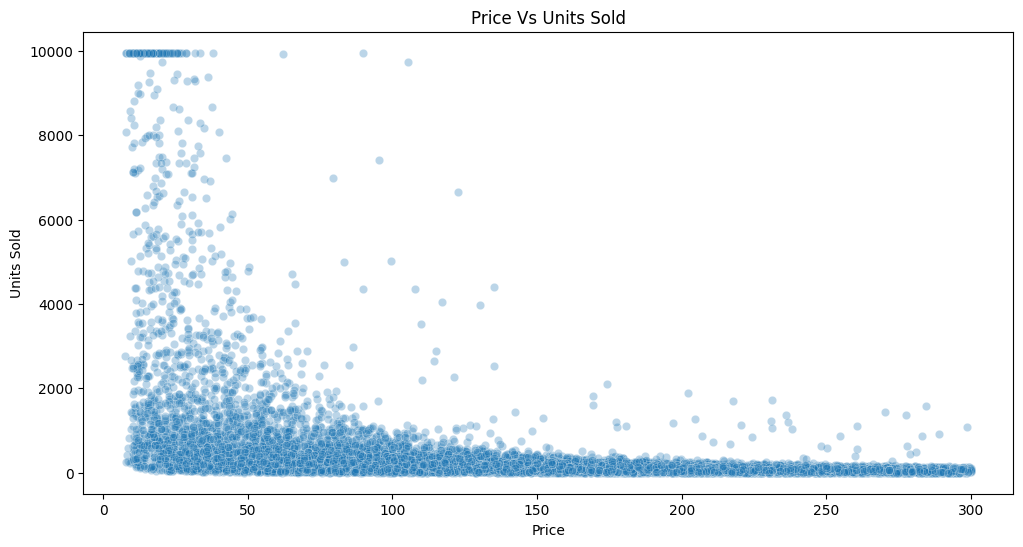

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='current_price', y='units_sold', alpha=0.3)
plt.title("Price Vs Units Sold")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.show()

#### Insights:
- As price increases, units sold generally decrease.

- However, the spread is wide → not all products respond the same way.

####Business Interpretation

- Demand is price-sensitive overall, but elasticity varies.

- A single pricing rule will not work across all products.

####Recommendation

- Avoid flat price increases across the catalog.

- Segment products by price sensitivity before changing prices.

#### Category-Level Price Elasticity

<Figure size 500x200 with 0 Axes>

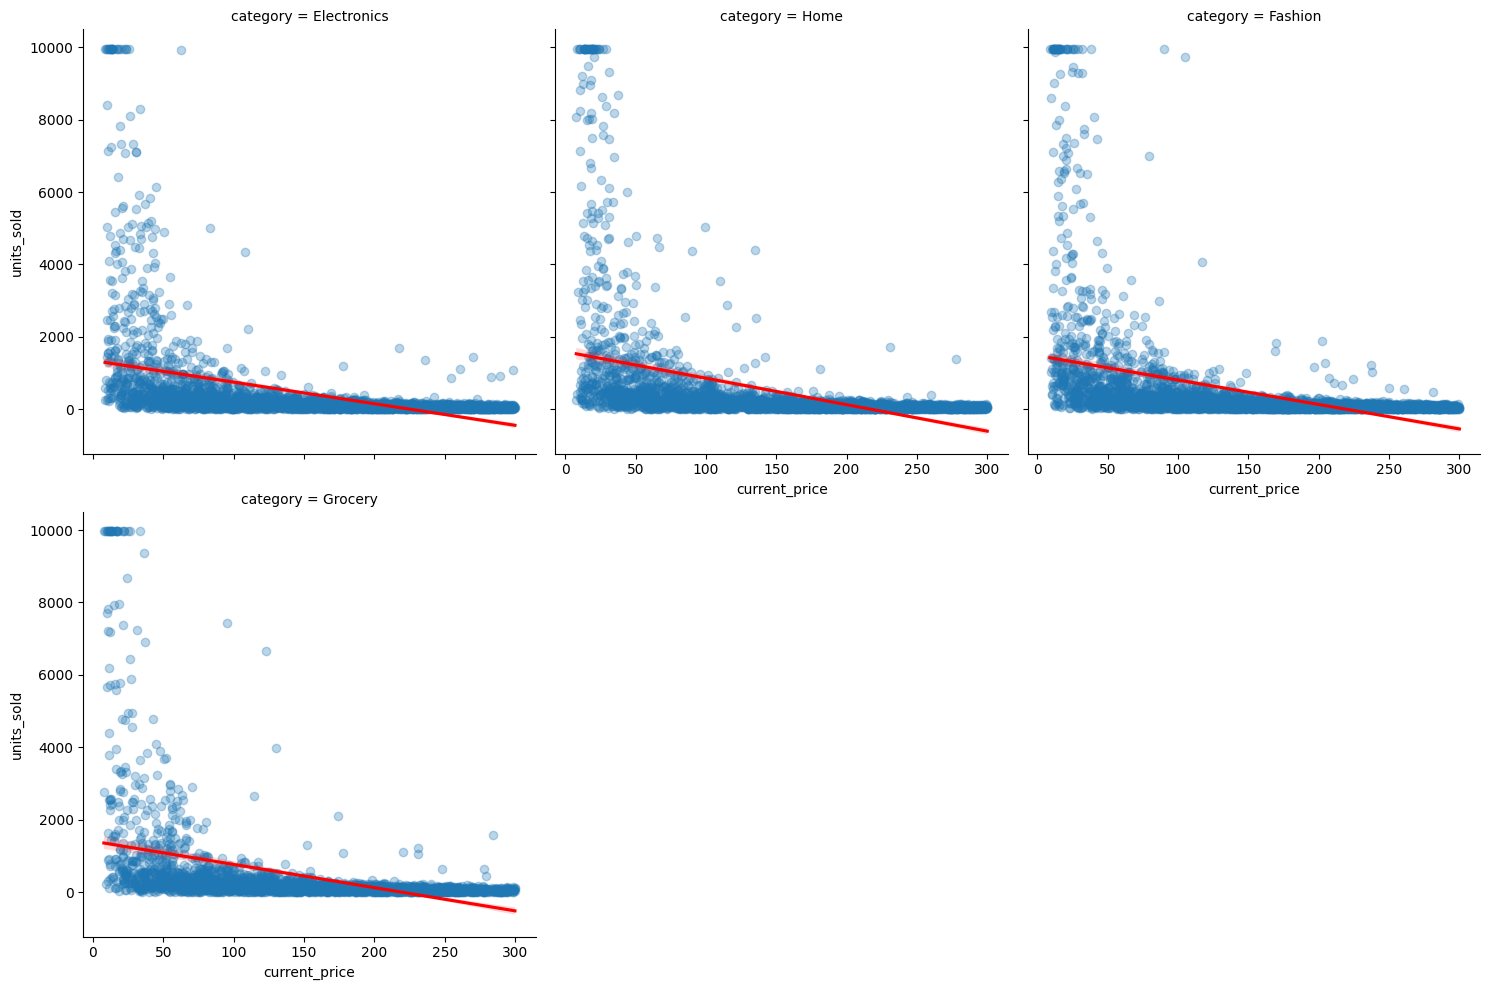

In [ ]:
plt.figure(figsize=(5,2))
sns.lmplot(data=df, x='current_price', y='units_sold', col='category', col_wrap=3, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.show()

#### Insights:
- Electronics, Fashion, Grocery, Home all show negative slopes.

- Some categories drop demand faster than others.

####Business Interpretation

- Categories behave differently:

    Steeper slope → customers are more price-sensitive

    Flatter slope → customers tolerate price changes

####Recommendation

- Elastic categories → cautious pricing, rely on volume

- Inelastic categories → opportunity to increase margins

##### Promotion Impact on Price Sensitivity

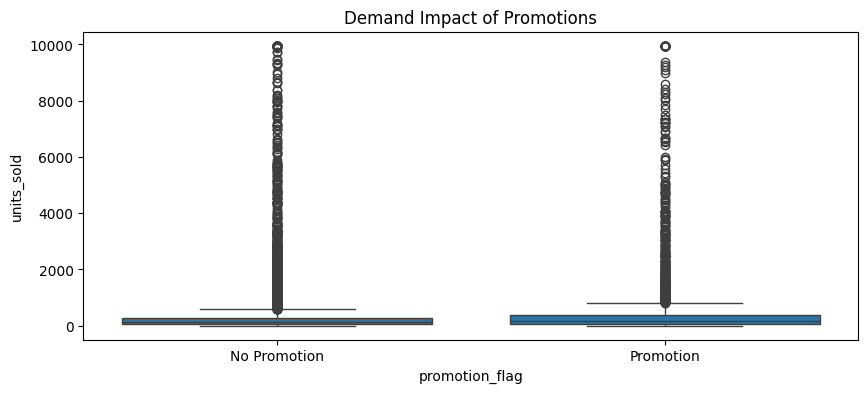

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='promotion_flag', y='units_sold')
plt.xticks([0,1], ['No Promotion', 'Promotion'])
plt.title("Demand Impact of Promotions")
plt.show()

#### Insight

- Promotions significantly increase units sold.

- Variability increases during promotions (spikes).

#### Business Interpretation

- Promotions work, but they introduce volatility.

- High demand without inventory planning = stockouts.

#### Recommendation

- Promotions must be inventory-led, not marketing-led.

- Promotions without stock readiness destroy revenue.

#### Competitor Price Pressure

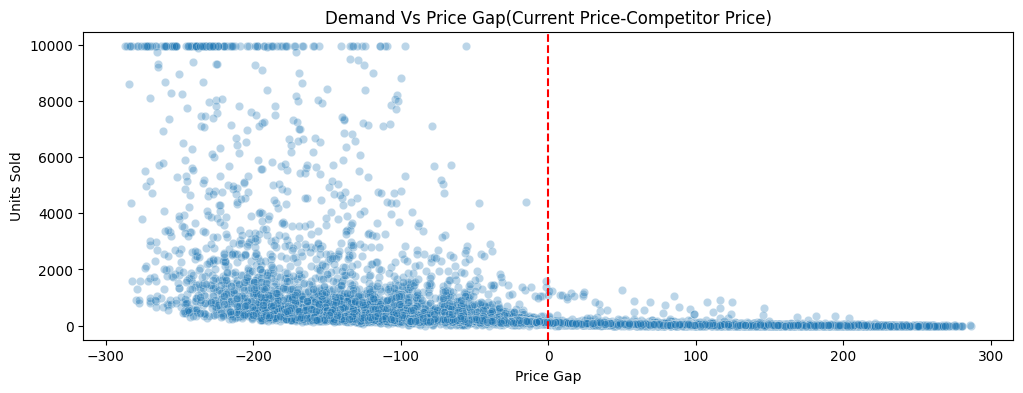

In [ ]:
df['Price_Gap']= df['current_price']-df['competitor_price']
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x='Price_Gap', y='units_sold', alpha=0.3)
plt.axvline(0, color='red', linestyle='--')
plt.title("Demand Vs Price Gap(Current Price-Competitor Price)")
plt.xlabel("Price Gap")
plt.ylabel("Units Sold")
plt.show()

#### Insight

- When price_gap > 0 (we are expensive) → demand falls

- When price_gap < 0 (we are cheaper) → demand increases

####Business Interpretation

- Customers are price-comparing.

- Relative price matters more than absolute price.

####Recommendation

- Monitor competitor prices continuously.

- Avoid being overpriced in elastic categories.

##### Elastic vs Inelastic Products
- High price → big demand drop → elastic
- Low price → small demand change → inelastic

In [ ]:
elasticity_summary= (df.groupby('category').apply(lambda x: x['units_sold'].corr(x['current_price'])).reset_index(name='price_demand_correlation'))
elasticity_summary

/tmp/ipython-input-2898321282.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  elasticity_summary= (df.groupby('category').apply(lambda x: x['units_sold'].corr(x['current_price'])).reset_index(name='price_demand_correlation'))


,category,price_demand_correlation
0,Electronics,-0.408791
1,Fashion,-0.401486
2,Grocery,-0.393972
3,Home,-0.412270


In [ ]:
elasticity_summary['elasticity_type'] = elasticity_summary['price_demand_correlation'].apply(lambda x: 'Elastic' if x < -0.5 else 'Inelastic')
elasticity_summary

,category,price_demand_correlation,elasticity_type
0,Electronics,-0.408791,Inelastic
1,Fashion,-0.401486,Inelastic
2,Grocery,-0.393972,Inelastic
3,Home,-0.412270,Inelastic


#### Insight

- All categories show moderate negative correlation.

- None are perfectly elastic or perfectly inelastic.

####Business Interpretation

- Demand reacts to price, but not explosively.

- Pricing optimization is possible without killing demand.

####Recommendation

- Use optimization, not intuition.

- Small price changes can materially impact revenue.

##### Revenue Perspective

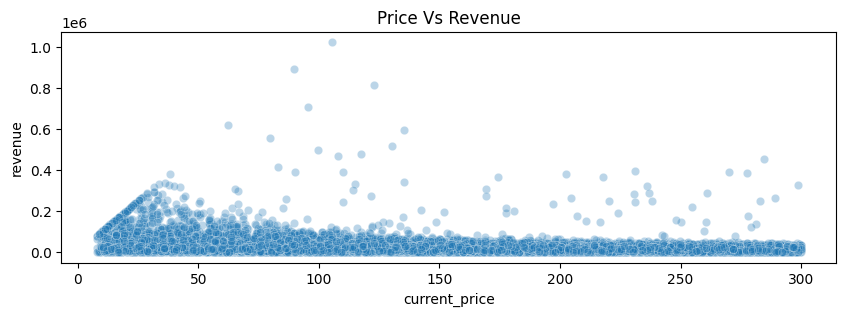

In [ ]:
df['revenue']= df['current_price']*df['units_sold']
plt.figure(figsize=(10,3))
sns.scatterplot(data=df, x='current_price', y='revenue', alpha=0.3)
plt.title("Price Vs Revenue")
plt.show()

#### Insight

- Revenue rises, peaks, then falls.

- Higher prices do NOT always mean higher revenue.

#### Business Interpretation

- There is an optimal price point.

- Pricing above that point reduces total revenue.

####Recommendation

- Stop thinking “higher price = more money”.

- Optimize price for revenue, not margin alone.

- Demand is sensitive to price, promotions, and competitor positioning.
- Optimal pricing requires category-specific strategies rather than uniform price changes.
- Promotions drive demand but must be aligned with inventory availability.
- Revenue optimization depends on identifying price points where demand and margin balance.